In [ ]:
#Apply Convolutional Neural Network algorithm to find the solution for any existing problem.

In [ ]:
#Load the Data

In [1]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

Using TensorFlow backend.


In [ ]:
#Analyze the Data

In [3]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [4]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

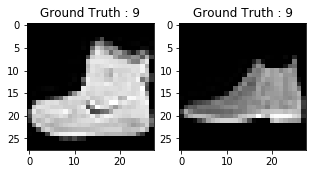

In [5]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [ ]:
#Data Preprocessing

In [6]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [8]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [10]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [ ]:
#Model the Data

In [11]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [12]:
batch_size = 64
epochs = 20
num_classes = 10

In [ ]:
#Neural Network Architecture

In [13]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
#Compile the Model

In [14]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [15]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

In [ ]:
#Train the Model

In [16]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 45s 934us/step - loss: 0.4612 - accuracy: 0.8324 - val_loss: 0.3346 - val_accuracy: 0.8823
Epoch 2/20
48000/48000 [==============================] - 48s 991us/step - loss: 0.2886 - accuracy: 0.8955 - val_loss: 0.2808 - val_accuracy: 0.8994
Epoch 3/20
48000/48000 [==============================] - 44s 919us/step - loss: 0.2406 - accuracy: 0.9111 - val_loss: 0.2535 - val_accuracy: 0.9040
Epoch 4/20
48000/48000 [==============================] - 46s 953us/step - loss: 0.2088 - accuracy: 0.9231 - val_loss: 0.2246 - val_accuracy: 0.9168
Epoch 5/20
48000/48000 [==============================] - 47s 973us/step - loss: 0.1838 - accuracy: 0.9313 - val_loss: 0.2342 - val_accuracy: 0.9155
Epoch 6/20
48000/48000 [==============================] - 49s 1ms/step - loss: 0.1594 - accuracy: 0.9409 - val_loss: 0.2414 - val_accuracy: 0.9177
Epoch 7/20
48000/48000 [==============================] -

In [ ]:
#Model Evaluation on the Test Set

In [17]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [18]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.48919368511736394
Test accuracy: 0.9172999858856201


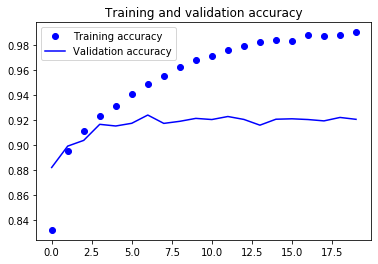

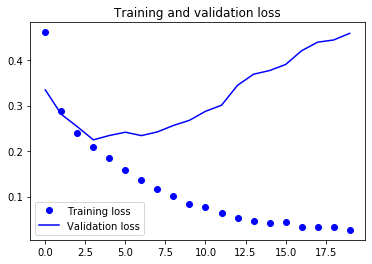

In [20]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#Adding Dropout into the Network

In [21]:
batch_size = 64
epochs = 20
num_classes = 10

In [22]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [23]:
fashion_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)         

In [24]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [25]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 54s 1ms/step - loss: 0.6027 - accuracy: 0.7746 - val_loss: 0.3697 - val_accuracy: 0.8687
Epoch 2/20
48000/48000 [==============================] - 51s 1ms/step - loss: 0.3757 - accuracy: 0.8630 - val_loss: 0.3161 - val_accuracy: 0.8820
Epoch 3/20
48000/48000 [==============================] - 48s 1ms/step - loss: 0.3266 - accuracy: 0.8792 - val_loss: 0.2731 - val_accuracy: 0.8986
Epoch 4/20
48000/48000 [==============================] - 52s 1ms/step - loss: 0.2951 - accuracy: 0.8900 - val_loss: 0.2530 - val_accuracy: 0.9082
Epoch 5/20
48000/48000 [==============================] - 54s 1ms/step - loss: 0.2777 - accuracy: 0.8974 - val_loss: 0.2424 - val_accuracy: 0.9092
Epoch 6/20
48000/48000 [==============================] - 54s 1ms/step - loss: 0.2656 - accuracy: 0.9021 - val_loss: 0.2377 - val_accuracy: 0.9116
Epoch 7/20
48000/48000 [==============================] - 61s 1ms/st

In [26]:
fashion_model.save("fashion_model_dropout.h5py")

In [ ]:
#Model Evaluation on the Test Set

In [27]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

10000/10000 [==============================] - 3s 316us/step


In [28]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.2232984503954649
Test accuracy: 0.9229000210762024


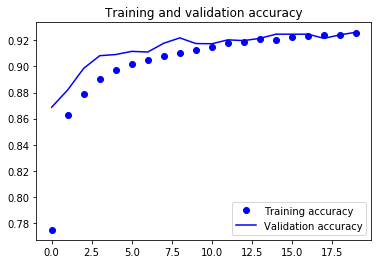

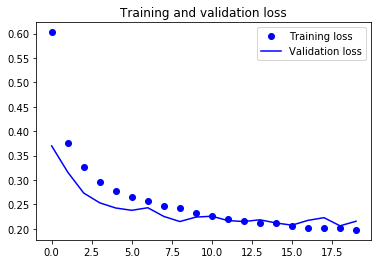

In [29]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#Predict Labels

In [30]:
predicted_classes = fashion_model.predict(test_X)

In [31]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [32]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Number of correct labels found = 9195


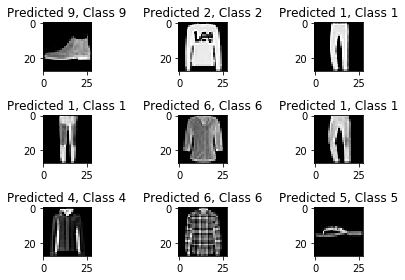

In [74]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Number of correct labels found =",len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Number of incorrect labels found = 805


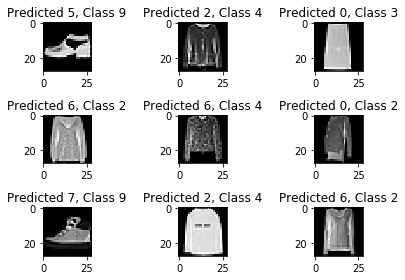

In [75]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Number of incorrect labels found =",len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [ ]:
#Classification Report

In [48]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.81      0.89      0.84      1000
     Class 1       1.00      0.98      0.99      1000
     Class 2       0.87      0.89      0.88      1000
     Class 3       0.91      0.93      0.92      1000
     Class 4       0.91      0.85      0.88      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.80      0.75      0.77      1000
     Class 7       0.94      0.98      0.96      1000
     Class 8       1.00      0.98      0.99      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

